In [152]:
import os, math, subprocess
import datetime as dt

#data wrangling
import numpy as np
import pandas as pd

#visualization
import seaborn as sns
import matplotlib.pyplot as plt

#excel library
import xlrd

#importing Statsmodels and Scikitlearn libraries
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [153]:
#Loading data
salary = pd.read_excel('salary features.xlsx')
salary

,customer_id,first_name,txn_description,payment_count,payment_sum,payment_type,avg_income_past_3_months,annual_salary_after_tax,weekly_income,weekly_tax_withholding,annual_salary
0,CUS-3142625864,Ricky,PAY/SALARY,13,33644.13,Weekly,2588.01,134577,2588.99,905.840400,181731
1,CUS-2738291516,Kenneth,PAY/SALARY,13,33081.88,Weekly,2544.76,132328,2545.99,889.070400,178623
2,CUS-2155701614,Linda,PAY/SALARY,13,31762.12,Weekly,2443.24,127048,2443.99,849.290400,171251
3,CUS-2031327464,Michael,PAY/SALARY,13,29644.68,Weekly,2280.36,118579,2280.99,785.720400,159469
4,CUS-261674136,Kenneth,PAY/SALARY,7,30837.10,Fortnightly,4405.30,114538,2203.99,755.690400,153834
5,CUS-527400765,Natasha,PAY/SALARY,7,29512.28,Fortnightly,4216.04,109617,2108.99,718.640400,146986
6,CUS-3336454548,Charles,PAY/SALARY,7,28925.61,Fortnightly,4132.23,107438,2066.99,702.260400,143956
7,CUS-2663907001,Craig,PAY/SALARY,6,24328.62,Fortnightly,4054.77,105424,2027.99,687.050400,141151
8,CUS-883482547,Michelle,PAY/SALARY,7,27842.22,Fortnightly,3977.46,103414,1989.99,672.230400,138370
9,CUS-1462656821,Isaiah,PAY/SALARY,7,27327.65,Fortnightly,3903.95,101503,1952.99,657.800400,135708


# Features Selection

1. Filter Method

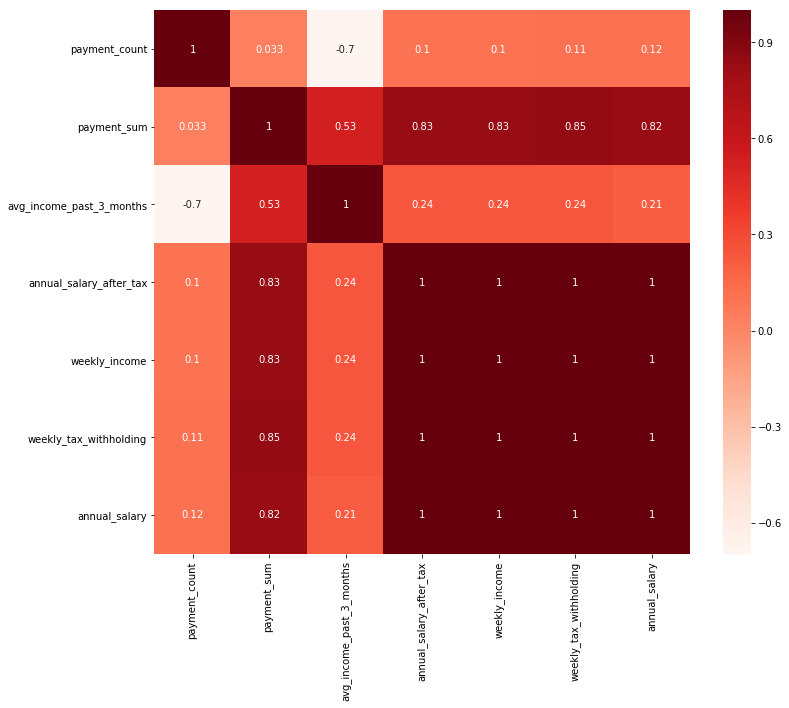

In [154]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = salary.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [155]:
#Correlation with output variable
cor_target = abs(cor['annual_salary'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

payment_sum                0.822878
annual_salary_after_tax    0.999371
weekly_income              0.999345
weekly_tax_withholding     0.998347
annual_salary              1.000000
Name: annual_salary, dtype: float64

In [156]:
#One of the assumptions of linear regression is that the independent variables 
#need to be uncorrelated with each other. 


In [157]:
#Highest correlation with Annual Salary is Annual Salary After Tax 
#Check correlation between Annual Salary After Tax and other variables
print(salary[["annual_salary_after_tax","payment_sum"]].corr())
print(salary[["annual_salary_after_tax","weekly_income"]].corr())
print(salary[["annual_salary_after_tax","weekly_tax_withholding"]].corr())
#One of the assumptions of linear regression is that the independent variables 
#need to be uncorrelated with each other.
#The least correlated to Anual_Salary_after_tax is payment sum

                         annual_salary_after_tax  payment_sum
annual_salary_after_tax                   1.0000       0.8333
payment_sum                               0.8333       1.0000
                         annual_salary_after_tax  weekly_income
annual_salary_after_tax                 1.000000       0.999918
weekly_income                           0.999918       1.000000
                         annual_salary_after_tax  weekly_tax_withholding
annual_salary_after_tax                 1.000000                0.998171
weekly_tax_withholding                  0.998171                1.000000


In [158]:
#Therefore Filter Method helped picking 'Annual salary after tax' & 'Payment Sum'
#as final features (x) for linear regression model

2. Wrapper Method:

In [159]:
target = salary
target['customer_id']= target['customer_id'].astype('str')
target['customer_id'] = target['customer_id'].str.strip("CUS-")
target = target.drop('first_name',1)
target = target.drop('txn_description',1)
target = target.drop('payment_type',1)
target.head(3)

,customer_id,payment_count,payment_sum,avg_income_past_3_months,annual_salary_after_tax,weekly_income,weekly_tax_withholding,annual_salary
0,3142625864,13,33644.13,2588.01,134577,2588.99,905.8404,181731
1,2738291516,13,33081.88,2544.76,132328,2545.99,889.0704,178623
2,2155701614,13,31762.12,2443.24,127048,2443.99,849.2904,171251


i. Backward Elimination: As the name suggest, we feed all the possible features to the model at first. We check the performance of the model and then iteratively remove the worst performing features one by one till the overall performance of the model comes in acceptable range

In [160]:
x = target.drop('annual_salary',1)   #Feature Matrix
y = target['annual_salary']          #Target Variable
#Adding constant column of ones, mandatory for sm.OLS model
x_1 = sm.add_constant(x)

#Fitting sm.OLS model
model = sm.OLS(y.astype(float), x_1.astype(float)).fit()
model.pvalues
#the variable ‘weekly_tax_withholding’ has highest pvalue of 0.5025 which is greater than 0.05
#P-values should be as low as 0, because changes in the predictor's value are related to changes in the response variable

C:\Users\My Computer\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                       5.820232e-13
customer_id                 2.378931e-01
payment_count               4.351131e-16
payment_sum                 2.465434e-01
avg_income_past_3_months    3.977531e-29
annual_salary_after_tax     4.261217e-07
weekly_income               4.547570e-04
weekly_tax_withholding      5.025073e-26
dtype: float64

In [169]:
#Backward Elimination
cols = list(x.columns)
pmax = 1
while (len(cols)>0):
    p= []
    x_1 = x[cols]
    x_1 = sm.add_constant(x_1)
    model = sm.OLS(y.astype(float), x_1.astype(float)).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features = cols
print(selected_features)

['payment_count', 'avg_income_past_3_months', 'annual_salary_after_tax', 'weekly_income', 'weekly_tax_withholding']


ii. RFE (Recursive Feature Elimination): method works by recursively removing attributes and building a model on those attributes that remain.

In [162]:
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 4)
#Transforming data using RFE
x_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(x_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False  True False  True False  True  True]
[4 1 3 1 2 1 1]


In [163]:
#no of features
nof_list=np.arange(1,7)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    x_train_rfe = rfe.fit_transform(x_train,y_train)
    x_test_rfe = rfe.transform(x_test)
    model.fit(x_train_rfe,y_train)
    score = model.score(x_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

Optimum number of features: 6
Score with 6 features: 0.999910


In [164]:
cols = list(x.columns)
model = LinearRegression()
#Initializing RFE model
rfe = RFE(model, 6)             
#Transforming data using RFE
x_rfe = rfe.fit_transform(x,y)  
#Fitting the data to model
model.fit(x_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['payment_count', 'payment_sum', 'avg_income_past_3_months',
       'annual_salary_after_tax', 'weekly_income', 'weekly_tax_withholding'],
      dtype='object')


3. Embedded Method

In [165]:
reg = LassoCV()
reg.fit(x, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(x,y))
coef = pd.Series(reg.coef_, index = x.columns)

Best alpha using built-in LassoCV: 2906094261.556234
Best score using built-in LassoCV: 0.004245


C:\Users\My Computer\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [166]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 1 variables and eliminated the other 6 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

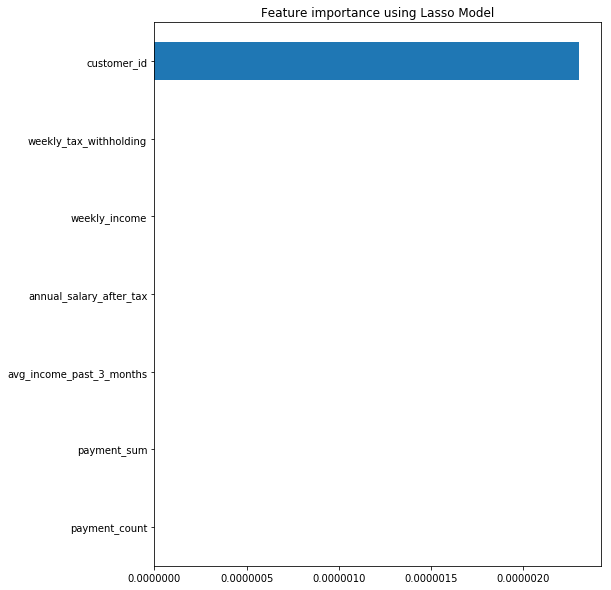

In [167]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

# Conclusion:

After trying 3 features selection methods: Filter, Wrapper & Embedded method.
=> Wrapper & Filter method gives the best result for features selection.